In [9]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

backend = Aer.get_backend('statevector_simulator')

def gauss_vector(n):
    g = signal.gaussian(2**n, (2**n)/12)
    g = g/np.sum(g)
    return np.sqrt(g)

def get_sv_diff(sv1, sv2):
    diff = 0
    for i in range(0,len(sv1)):
        diff += math.pow(abs(sv1[i]-sv2[i]),2)
    diff = math.sqrt(diff)/len(sv1)
    return diff

def analyze_qasm(qubits_count, qasm):
    N = qubits_count
    input_vector = gauss_vector(N)
    input_dist = np.power(np.abs(input_vector), 2)
    qc = QuantumCircuit.from_qasm_str(qasm)


    job = execute(qc, backend=backend)
    job_result = job.result()

    output_vector = job_result.get_statevector(qc)
    output_dist = np.abs(output_vector)**2

    diff = get_sv_diff(input_vector, output_vector)
    print("\nReturned circuit:\n")
    print(qc.qasm())

#     print("\nExpected state vector:\n")
#     print(repr(input_vector))

#     print("\nReal state vector:\n")
#     print(repr(output_vector))

#     print("\nInput distribution:\n")
#     print(repr(input_dist))

#     print("\nOutput distribution:\n")
#     print(repr(output_dist))

    plt.figure(figsize=(15, 12))
    plt.plot(range(len(input_dist)), input_dist)
    plt.plot(range(len(output_dist)), output_dist)
    plt.show()
    print("\nSV diff (L2norm/svcount):",diff)
    print("\nL1 distance:", np.sum(np.abs(input_dist-output_dist)))



Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
ry(0.75159097) q[0];
ry(1.0342784) q[1];
cx q[0],q[1];
ry(2.276248) q[1];
cx q[1],q[0];
ry(-0.52122915) q[1];
ry(1.5708188) q[2];
cx q[2],q[0];
cx q[2],q[1];



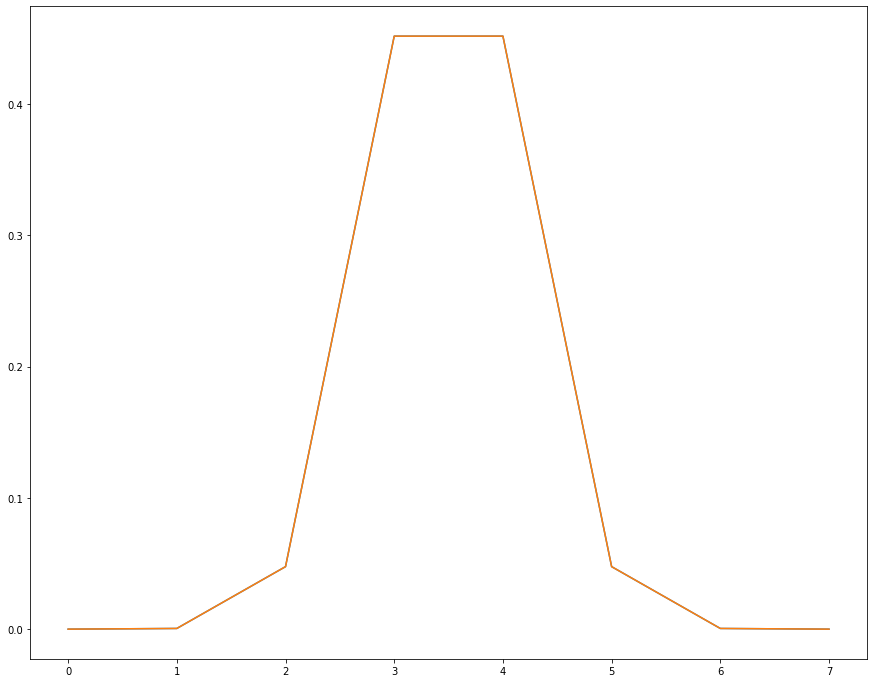


SV diff (L2norm/svcount): 4.840186378570323e-06

L1 distance: 2.9403980238123005e-05


In [10]:
qasm3 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
ry (0.751590967178345) q[0];
ry (1.034278392791748) q[1];
ry (1.570818781852722) q[2];
cx q[0], q[1];
ry (2.276247978210449) q[1];
cx q[1], q[0];
ry (-0.521229147911072) q[1];
cx q[2], q[0];
cx q[2], q[1];
"""

analyze_qasm(3, qasm3)



Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry(-0.089775637) q[0];
ry(-2.0861354) q[1];
cx q[0],q[1];
ry(0.67223793) q[1];
ry(3.1194448) q[2];
cx q[0],q[2];
ry(-2.4415495) q[0];
cx q[1],q[0];
ry(2.8061211) q[0];
ry(1.5707979) q[3];
cx q[3],q[2];
cx q[2],q[0];
cx q[0],q[1];



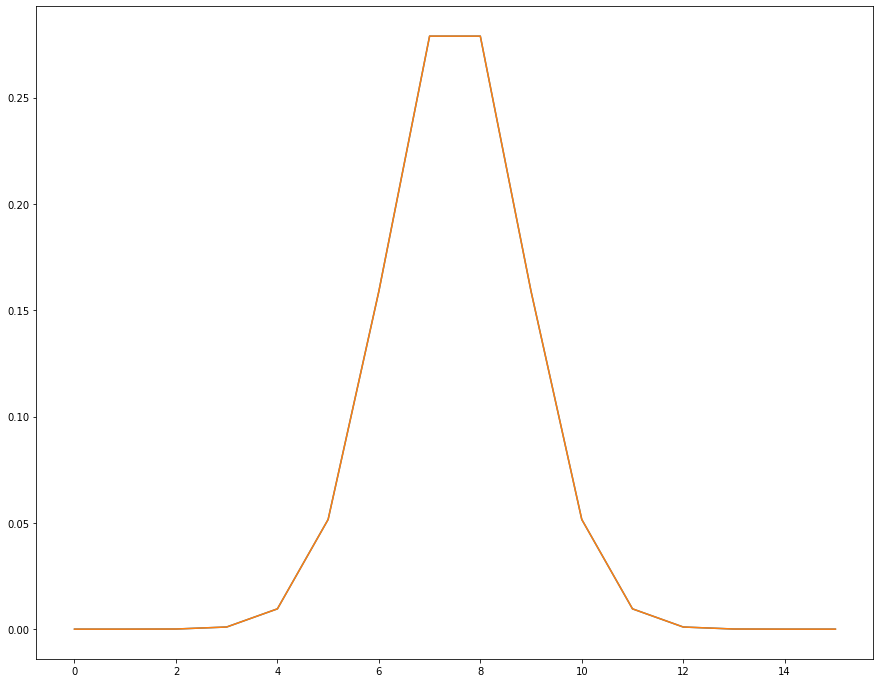


SV diff (L2norm/svcount): 2.195976415182994e-06

L1 distance: 4.8882832059616964e-05


In [11]:
qasm4 = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry (-0.089775636792183) q[0];
ry (-2.086135387420654) q[1];
ry (3.119444847106934) q[2];
ry (1.570797920227051) q[3];
cx q[0], q[1];
ry (0.672237932682037) q[1];
cx q[0], q[2];
ry (-2.441549539566040) q[0];
cx q[1], q[0];
ry (2.806121110916138) q[0];
cx q[3], q[2];
cx q[2], q[0];
cx q[0], q[1];
"""
analyze_qasm(4, qasm4)


Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
ry(-1.1993883) q[0];
ry(1.9661224) q[1];
cx q[1],q[0];
ry(0.94867277) q[0];
ry(-1.7125731) q[2];
cx q[2],q[0];
cx q[1],q[0];
ry(1.4794549) q[0];
ry(1.0482289) q[1];
cx q[1],q[0];
ry(-1.465892) q[0];
ry(-1.2301875) q[1];
cx q[1],q[2];
ry(1.5708293) q[3];
cx q[1],q[3];
cx q[3],q[0];
ry(1.7054205) q[4];
cx q[2],q[4];
cx q[3],q[2];
ry(1.4319172) q[4];
cx q[4],q[0];
cx q[3],q[4];
cx q[4],q[1];



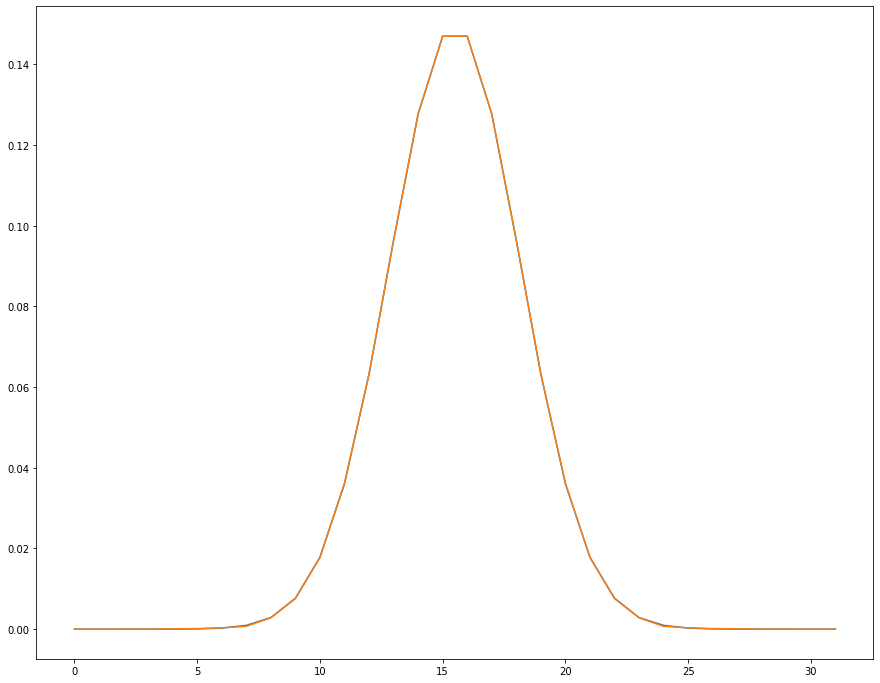


SV diff (L2norm/svcount): 0.00032376007092359705

L1 distance: 0.0018785202016707078


In [12]:
# solution that have very large diff ( see the SV diff (L2norm/svcount))
qasm5_low = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
ry (-1.199388265609741) q[0];
ry (1.966122388839722) q[1];
ry (-1.712573051452637) q[2];
ry (1.570829272270203) q[3];
ry (1.705420494079590) q[4];
cx q[1], q[0];
ry (0.948672771453857) q[0];
cx q[2], q[0];
cx q[1], q[0];
ry (1.479454874992371) q[0];
ry (1.048228859901428) q[1];
cx q[1], q[0];
ry (-1.465891957283020) q[0];
ry (-1.230187535285950) q[1];
cx q[1], q[2];
cx q[1], q[3];
cx q[2], q[4];
ry (1.431917190551758) q[4];
cx q[3], q[0];
cx q[3], q[2];
cx q[4], q[0];
cx q[3], q[4];
cx q[4], q[1];
"""
analyze_qasm(5, qasm5_low)